In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image, ImageDraw
import pandas

In [2]:
# Use Pandas to Read Ten Min Sustained Windspeed Data File
Windspeed_File = pandas.read_csv("Ten_Min_Windspeed_Data_Output.csv")
Windspeed_File.head()

,Typhoon Code,Typhoon Name,Bluff Head (Stanley),Central Pier,Cheung Chau,Cheung Chau Beach,Green Island,Hong Kong International Airport,Kai Tak,King's Park,...,Tai Po Kau,Tap Mun East,Tate's Cairn,Tseung Kwan O,Tsing Yi Shell Oil Depot,Tuen Mun Government Offices,Waglan Island,Wetland Park,Wong Chuk Hang,
0,(2002,Nuri,NaN,40.0,57.0,58.0,52.0,46.0,40.0,31.0,...,39.0,61.0,66.0,19.0,30.0,30.0,60.0,19.0,29.0,
1,(1914,Kajiki,38.0,41.0,63.0,60.0,59.0,40.0,32.0,30.0,...,42.0,53.0,62.0,18.0,26.0,15.0,68.0,17.0,28.0,
2,(1912,Podul,36.0,41.0,46.0,55.0,52.0,41.0,31.0,27.0,...,42.0,53.0,51.0,15.0,24.0,18.0,58.0,20.0,28.0,
3,(1911,Bailu,27.0,30.0,36.0,47.0,40.0,43.0,25.0,20.0,...,17.0,32.0,NaN,12.0,25.0,20.0,53.0,17.0,20.0,
4,(1907,Wipha,62.0,52.0,87.0,79.0,69.0,59.0,47.0,41.0,...,53.0,74.0,87.0,26.0,43.0,29.0,94.0,25.0,39.0,


In [3]:
# Use Pandas to Read Wind Direction Data File
Wind_Directions_File = pandas.read_csv("Wind_Direction_Data_Output.csv")
Wind_Directions_File.head()

,Typhoon Code,Typhoon Name,N,NNE,NE,ENE,E,ESE,SE,SSE,S,SSW,SW,WSW,W,WNW,NW,NNW,
0,(2002,Nuri,0,0,0,2,15,9,2,3,0,0,0,0,0,0,0,0,
1,(1914,Kajiki,0,3,0,7,22,2,0,0,0,0,0,0,0,0,0,0,
2,(1912,Podul,0,0,0,8,20,2,1,0,0,0,0,0,0,0,0,0,
3,(1911,Bailu,1,0,2,2,1,0,0,0,0,2,2,5,9,3,1,2,
4,(1907,Wipha,0,0,1,3,21,5,4,0,0,0,0,0,0,0,0,0,


In [4]:
# Use Pandas to Read Typhoon CPA Data File
Typhoon_CPA_File = pandas.read_csv("Typhoon_CPA_Data.csv")
Typhoon_CPA_File.head()

,Typhoon Code,Typhoon Name,Highest Typhoon Signal Issued,Closest Point of Approach (km),CPA Bearing,CPA Intensity (km/h),CPA Radius of Maximum Winds (km),CPA Date,CPA Time
0,(2002,Nuri,3,190,SSW,75,60,14/6/2020,02:00
1,(1914,Kajiki,3,330,S,55,185,1/9/2019,21:00
2,(1912,Podul,1,560,S,85,120,29/8/2019,02:00
3,(1911,Bailu,1,370,NNE,90,65,25/8/2019,07:00
4,(1907,Wipha,8,310,SSW,85,150,31/8/2019,17:00


In [5]:
# Use Pandas to Read Each Station's Windspeed Ratio to Average of HK Data File
Windspeed_Ratio_File = pandas.read_csv("Windspeed_Ratio_To_HK_Average_Output.csv")
Windspeed_Ratio_File.head()

,Quadrant,Bluff Head (Stanley),Central Pier,Cheung Chau,Cheung Chau Beach,Green Island,Hong Kong International Airport,Kai Tak,King's Park,Lau Fau Shan,...,Tai Mo Shan,Tai Po Kau,Tate's Cairn,Tseung Kwan O,Tsing Yi Shell Oil Depot,Tuen Mun Government Offices,Waglan Island,Wetland Park,Wong Chuk Hang,
0,Eastern,0.840653,0.982202,1.241128,1.069891,1.464367,1.173410,0.952176,0.708663,1.178894,...,1.723796,0.810713,1.618002,0.583473,0.787003,0.703106,1.489535,0.635908,0.695322,
1,Southern,1.041325,1.040797,1.377973,1.467625,1.359325,1.065658,0.840750,0.680532,0.854044,...,1.695112,0.935505,1.501559,0.487587,0.617457,0.581964,1.513431,0.587966,0.759387,
2,Western,1.140189,0.980067,1.475038,1.354671,1.236311,1.109107,0.937698,0.676632,0.792161,...,1.755205,0.920702,1.401321,0.490399,0.734350,0.680454,1.465843,0.563493,0.750439,
3,Northern,1.022138,0.904393,1.348200,1.176538,1.309309,1.283019,0.913253,0.622857,1.327497,...,1.833009,0.808862,1.441112,0.467673,0.835697,0.723603,1.549984,0.539989,0.642967,


In [6]:
# Convert Windspeed Stations Columm Names Into List
Windspeed_Stations_List = list(Windspeed_File.columns)
del Windspeed_Stations_List[0]
del Windspeed_Stations_List[0]
del Windspeed_Stations_List[len(Windspeed_Stations_List)-1]
#
# Input Windspeed Data Into 2D Array
Windspeed_Array = numpy.zeros((len(Windspeed_File),len(Windspeed_Stations_List)))
for i in range(len(Windspeed_Array)):
    for j in range(len(Windspeed_Array[i])):
        Windspeed_Array[i][j] = Windspeed_File.iloc[i,j+2]

In [7]:
# Create Lists or Arrays of Each Variable
Typhoon_Code_List = list(Typhoon_CPA_File["Typhoon Code"])
Typhoon_Name_List = list(Typhoon_CPA_File["Typhoon Name"])
Typhoon_Signal_Array = numpy.array(Typhoon_CPA_File["Highest Typhoon Signal Issued"])
CPA_Distance_Array = numpy.array(Typhoon_CPA_File["Closest Point of Approach (km)"])
CPA_Bearing_List = list(Typhoon_CPA_File["CPA Bearing"])
CPA_Intensity_Array = numpy.array(Typhoon_CPA_File["CPA Intensity (km/h)"])
CPA_R_Max_Array = numpy.array(Typhoon_CPA_File["CPA Radius of Maximum Winds (km)"])

In [8]:
# Create Directions Circle List
Directions_Circle = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
#
# Create Empty Lists To Store Typhoon Codes and Names In Each Quadrant of CPA Directions
Quadrant_Typhoon_Code = [[], [], [], []]
Quadrant_Typhoon_Name = [[], [], [], []]
Quadrant_Typhoon_Signal = [[], [], [], []]
Quadrant_CPA_Distance = [[], [], [], []]
Quadrant_CPA_Intensity = [[], [], [], []]
Quadrant_CPA_R_Max = [[], [], [], []]
Quadrant_Windspeeds = [[], [], [], []]
#
# Create Empty List To Add Up Wind Directions For Each Quadrant of CPA Directions
Quadrant_Wind_Direction = numpy.zeros((4, 16))
#
# Input Data and Add Up Wind Directions According To Each Quadrant of CPA Directions
for i in range(len(CPA_Bearing_List)):
    if CPA_Bearing_List[i] == Directions_Circle[2] or CPA_Bearing_List[i] == Directions_Circle[3] or \
    CPA_Bearing_List[i] == Directions_Circle[4] or CPA_Bearing_List[i] == Directions_Circle[5]:
        Quadrant_Typhoon_Code[0].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[0].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[0].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[0].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[0].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[0].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[0].append(Windspeed_Array[i])
        for l in range(len(Directions_Circle)):
            Quadrant_Wind_Direction[0][l] += Wind_Directions_File[Directions_Circle[l]][i]
    if CPA_Bearing_List[i] == Directions_Circle[6] or CPA_Bearing_List[i] == Directions_Circle[7] or \
    CPA_Bearing_List[i] == Directions_Circle[8] or CPA_Bearing_List[i] == Directions_Circle[9]:
        Quadrant_Typhoon_Code[1].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[1].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[1].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[1].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[1].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[1].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[1].append(Windspeed_Array[i])
        for l in range(len(Directions_Circle)):
            Quadrant_Wind_Direction[1][l] += Wind_Directions_File[Directions_Circle[l]][i]
    if CPA_Bearing_List[i] == Directions_Circle[10] or CPA_Bearing_List[i] == Directions_Circle[11] or \
    CPA_Bearing_List[i] == Directions_Circle[12] or CPA_Bearing_List[i] == Directions_Circle[13]:
        Quadrant_Typhoon_Code[2].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[2].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[2].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[2].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[2].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[2].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[2].append(Windspeed_Array[i])
        for l in range(len(Directions_Circle)):
            Quadrant_Wind_Direction[2][l] += Wind_Directions_File[Directions_Circle[l]][i]
    if CPA_Bearing_List[i] == Directions_Circle[14] or CPA_Bearing_List[i] == Directions_Circle[15] or \
    CPA_Bearing_List[i] == Directions_Circle[0] or CPA_Bearing_List[i] == Directions_Circle[1]:
        Quadrant_Typhoon_Code[3].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[3].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[3].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[3].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[3].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[3].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[3].append(Windspeed_Array[i])
        for l in range(len(Directions_Circle)):
            Quadrant_Wind_Direction[3][l] += Wind_Directions_File[Directions_Circle[l]][i]

In [9]:
# Calculate Wind Direction Proportion For Each Quadrant of CPA Directions
Quadrant_Wind_Direction_Proportion = numpy.empty((4, 16))
for k in range(4):
    Quadrant_Wind_Direction_Proportion[k] = Quadrant_Wind_Direction[k] / numpy.sum(Quadrant_Wind_Direction[k])

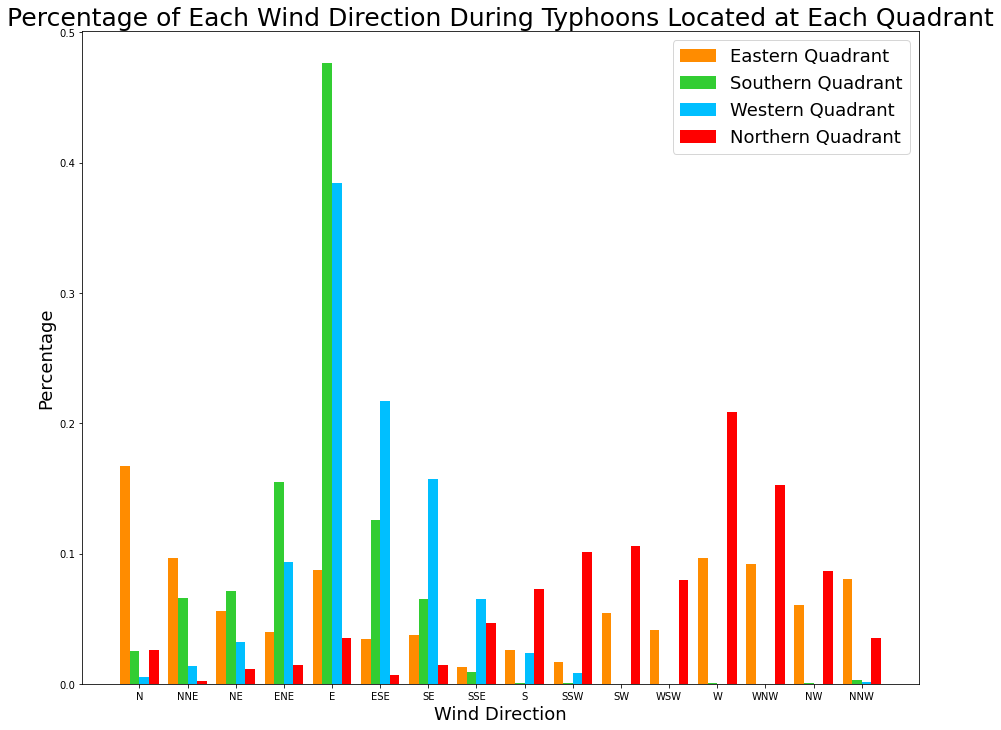

In [10]:
# Draw Bar Graph of Wind Directions For Each Quadrant of CPA Directions
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Bar_Index = numpy.arange(len(Directions_Circle))
Bar_Width = 0.20
Axes.bar(Bar_Index-Bar_Width*0.5, Quadrant_Wind_Direction_Proportion[0], Bar_Width, color='darkorange', \
label='Eastern Quadrant')
Axes.bar(Bar_Index+Bar_Width*0.5, Quadrant_Wind_Direction_Proportion[1], Bar_Width, color='limegreen', \
label='Southern Quadrant')
Axes.bar(Bar_Index+Bar_Width*1.5, Quadrant_Wind_Direction_Proportion[2], Bar_Width, color='deepskyblue', \
label='Western Quadrant')
Axes.bar(Bar_Index+Bar_Width*2.5, Quadrant_Wind_Direction_Proportion[3], Bar_Width, color='red', \
label='Northern Quadrant')
Axes.set_xlabel('Wind Direction', fontsize=18)
Axes.set_ylabel('Percentage', fontsize=18)
pyplot.title('Percentage of Each Wind Direction During Typhoons Located at Each Quadrant', fontsize=25)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(Bar_Index + Bar_Width, Directions_Circle)
pyplot.show()

In [11]:
# Create Array of Typhoons Windspeeds for All Typhoons at All Stations
All_Windspeed_List = []
for j in range(len(Windspeed_Array[0])):
    for i in range(len(Windspeed_Array)):
        All_Windspeed_List.append(Windspeed_Array[i][j])
All_Windspeed_Array = numpy.array(All_Windspeed_List)
print (All_Windspeed_Array)
#
# Create Array of Typhoons Windspeeds for Each Quadrant at All Stations
Quadrant_All_Windspeed_List = []
for k in range(4):
    Quadrant_All_Windspeed_List.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        for j in range(len(Quadrant_Windspeeds[k][0])):
            Quadrant_All_Windspeed_List[k].append(Quadrant_Windspeeds[k][i][j])

[nan 38. 36. ... 45. 39. 15.]


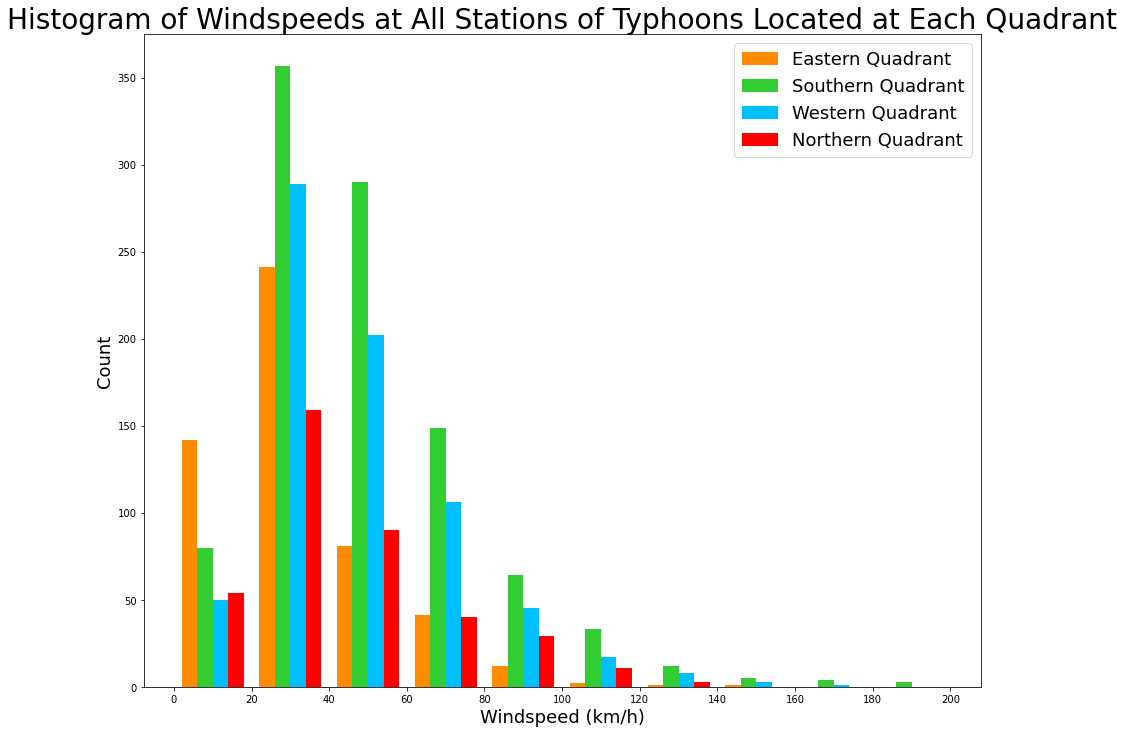

In [12]:
# Draw Histogram of Typhoon CPA Intensities For Each Quadrant of CPA Directions at All Stations
All_Windspeed_Quadrant_Bins = numpy.zeros(11)
for n in range(len(All_Windspeed_Quadrant_Bins)):
    All_Windspeed_Quadrant_Bins[n] = 20*n
Colours = ['darkorange','limegreen','deepskyblue','red']
Labels = ['Eastern Quadrant', 'Southern Quadrant', 'Western Quadrant', 'Northern Quadrant']
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Axes.hist(Quadrant_All_Windspeed_List, bins=All_Windspeed_Quadrant_Bins, color=Colours,label=Labels)
Axes.set_xlabel('Windspeed (km/h)', fontsize=18)
Axes.set_ylabel('Count', fontsize=18)
pyplot.title('Histogram of Windspeeds at All Stations of Typhoons Located at Each Quadrant', fontsize=28)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(All_Windspeed_Quadrant_Bins)
pyplot.show()

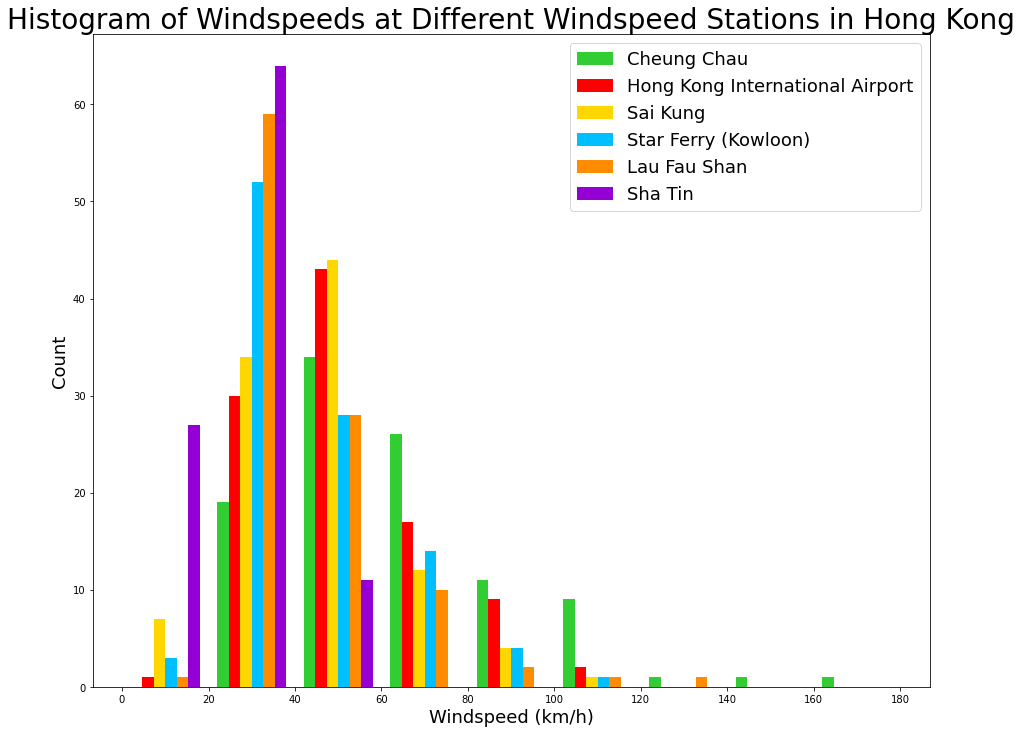

In [13]:
# Draw Histogram of All Typhoon Windspeeds at Different Windspeed Stations
Diff_Stations_Windspeed_Bins = numpy.zeros(10)
for n in range(len(Diff_Stations_Windspeed_Bins)):
    Diff_Stations_Windspeed_Bins[n] = 20*n
Windspeed_Stations_Plotting = [Windspeed_File["Cheung Chau"], Windspeed_File["Hong Kong International Airport"], \
Windspeed_File["Sai Kung"], Windspeed_File["Star Ferry (Kowloon)"], \
Windspeed_File["Lau Fau Shan"], Windspeed_File["Sha Tin"]]
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'Hong Kong International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Axes.hist(Windspeed_Stations_Plotting, bins=Diff_Stations_Windspeed_Bins, color=Colours,label=Labels)
Axes.set_xlabel('Windspeed (km/h)', fontsize=18)
Axes.set_ylabel('Count', fontsize=18)
pyplot.title('Histogram of Windspeeds at Different Windspeed Stations in Hong Kong', fontsize=28)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(Diff_Stations_Windspeed_Bins)
pyplot.show()

Text(0.5, 1.0, 'Box Plot of Windspeeds at Different Windspeed Stations in Hong Kong')

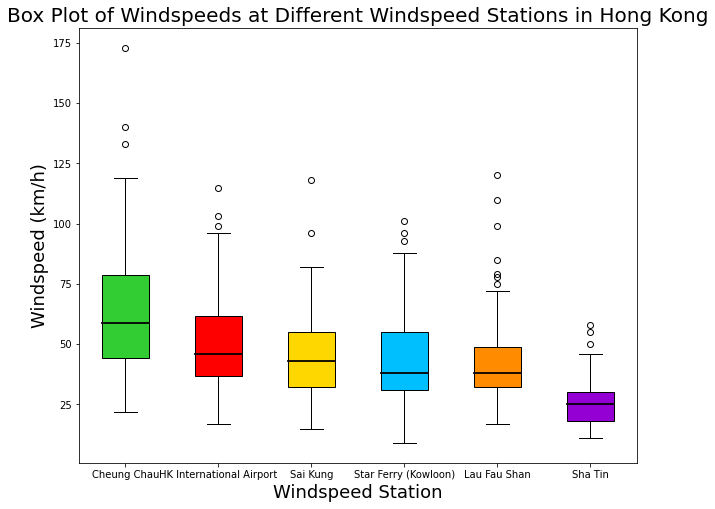

In [14]:
# Draw Box Plot of All Typhoon Windspeeds at Different Windspeed Stations
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Boxplot = pyplot.boxplot(Windspeed_Stations_Plotting, patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Different Windspeed Stations in Hong Kong', fontsize=20)

In [15]:
# Create List of Typhoons Windspeeds at Different Wind Stations For Each Quadrant of CPA Directions
Diff_Stations_Index = [2,5,14,19,9,17]
Diff_Stations_Quadrant_Windspeed_List = []
for k in range(4):
    Diff_Stations_Quadrant_Windspeed_List.append([])
    for j in range(6):
        Diff_Stations_Quadrant_Windspeed_List[k].append([])
        for i in range(len(Quadrant_Windspeeds[k])):
            Diff_Stations_Quadrant_Windspeed_List[k][j].append(Quadrant_Windspeeds[k][i][Diff_Stations_Index[j]])

Text(0.5, 1.0, 'Box Plot of Windspeeds at Different Stations of Typhoons Located at Eastern Quadrant')

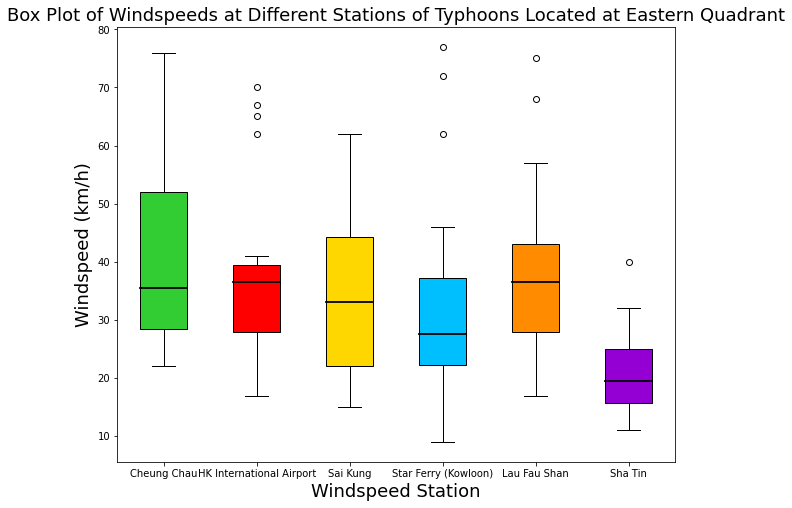

In [16]:
# Draw Box Plot of Typhoons Windspeeds at Different Wind Stations at Eastern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Eastern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[0], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Eastern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Eastern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Different Stations of Typhoons Located at Eastern Quadrant', fontsize=18)

Text(0.5, 1.0, 'Box Plot of Windspeeds at Different Stations of Typhoons Located at Southern Quadrant')

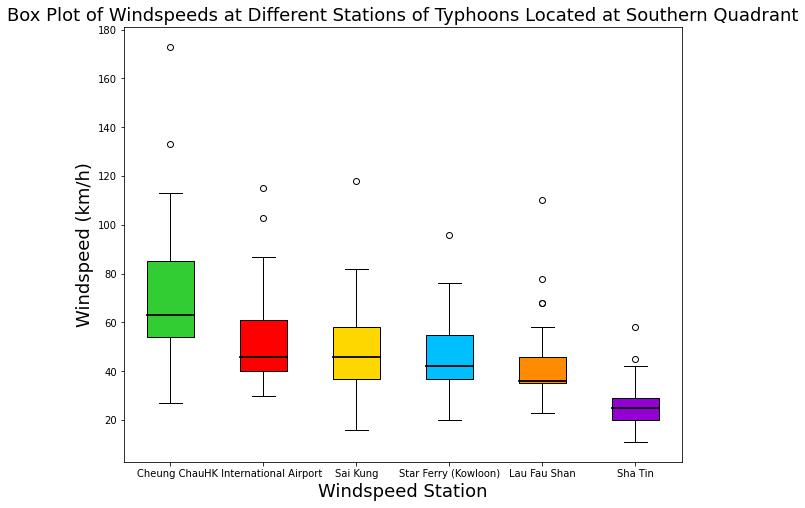

In [17]:
# Draw Box Plot of Typhoons Windspeeds at Different Wind Stations at Southern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Southern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[1], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Southern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Southern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Different Stations of Typhoons Located at Southern Quadrant', fontsize=18)

Text(0.5, 1.0, 'Box Plot of Windspeeds at Different Stations of Typhoons Located at Western Quadrant')

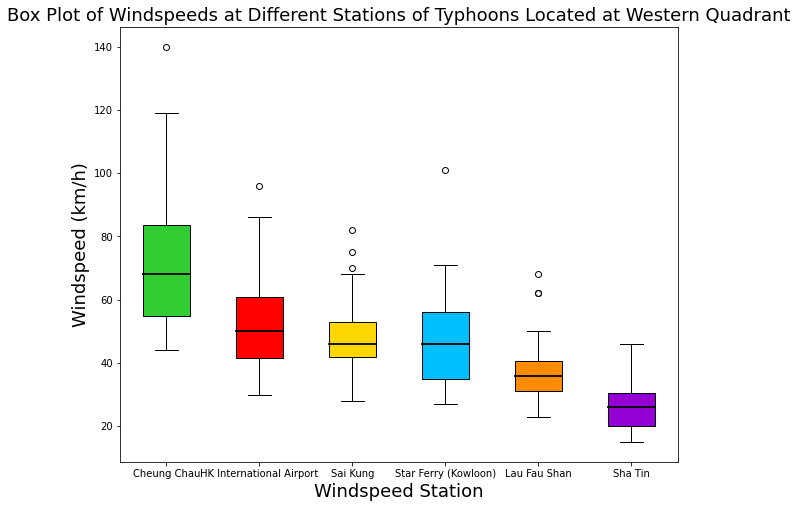

In [18]:
# Draw Box Plot of Typhoons Windspeeds at Different Wind Stations at Western Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Western_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[2], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Western_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Western_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Different Stations of Typhoons Located at Western Quadrant', fontsize=18)

Text(0.5, 1.0, 'Box Plot of Windspeeds at Different Stations of Typhoons Located at Northern Quadrant')

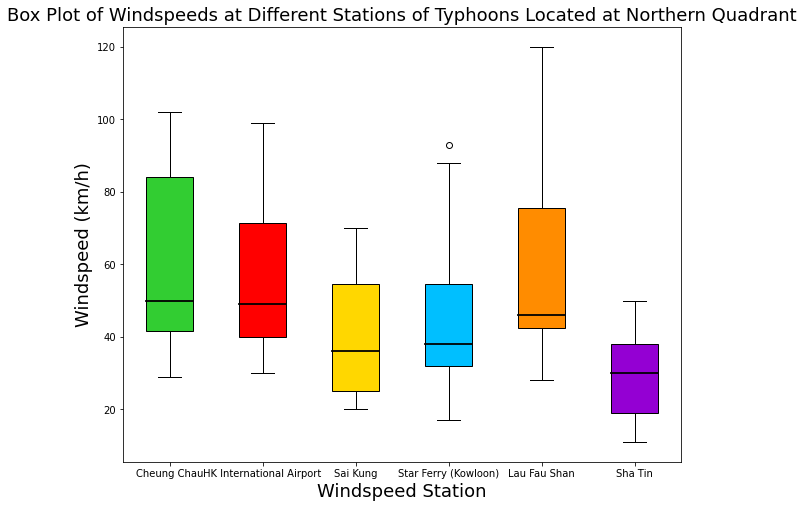

In [19]:
# Draw Box Plot of Typhoons Windspeeds at Different Wind Stations at Northern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Northern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[3], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Northern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Northern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Different Stations of Typhoons Located at Northern Quadrant', fontsize=18)

0.23088385109099974 21.899708579808788
0.35811751532925906


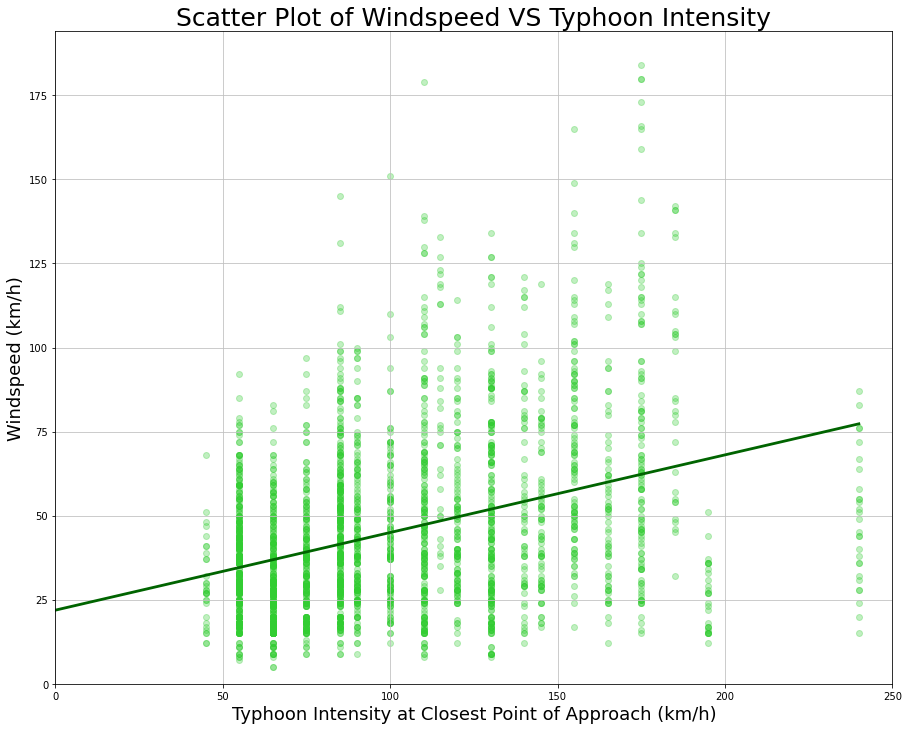

In [20]:
# Create Array of Typhoon Intensities Corresponding With Each Windspeed Data
All_Intensity_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_Intensity_Array)):
    All_Intensity_Array[i] = CPA_Intensity_Array[i % len(CPA_Intensity_Array)]
All_Intensity_Array_No_Nan = All_Intensity_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds VS Intensity of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_Intensity_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeed VS Typhoon Intensity', fontsize=25)
Axes.set_xlabel('Typhoon Intensity at Closest Point of Approach (km/h)', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_Intensity_Array_No_Nan)+10)
pyplot.ylim(0, numpy.max(All_Windspeed_Array_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit
All_Windspeed_Intensity_Slope, All_Windspeed_Intensity_Intercept = \
numpy.polyfit(All_Intensity_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Intensity_Best_Fit_x = numpy.arange(numpy.max(All_Intensity_Array)+1)
All_Windspeed_Intensity_Best_Fit_Line = All_Windspeed_Intensity_Slope*All_Windspeed_Intensity_Best_Fit_x + \
All_Windspeed_Intensity_Intercept
pyplot.plot(All_Windspeed_Intensity_Best_Fit_x, All_Windspeed_Intensity_Best_Fit_Line, c='darkgreen', linewidth=2.8)
print (All_Windspeed_Intensity_Slope, All_Windspeed_Intensity_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Intensity_Correlation_Matrix = numpy.corrcoef(All_Intensity_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Intensity_Correlation = All_Windspeed_Intensity_Correlation_Matrix[0][1]
print (All_Windspeed_Intensity_Correlation)

-0.05209445756622745 59.98593839712122
-0.34252452543165


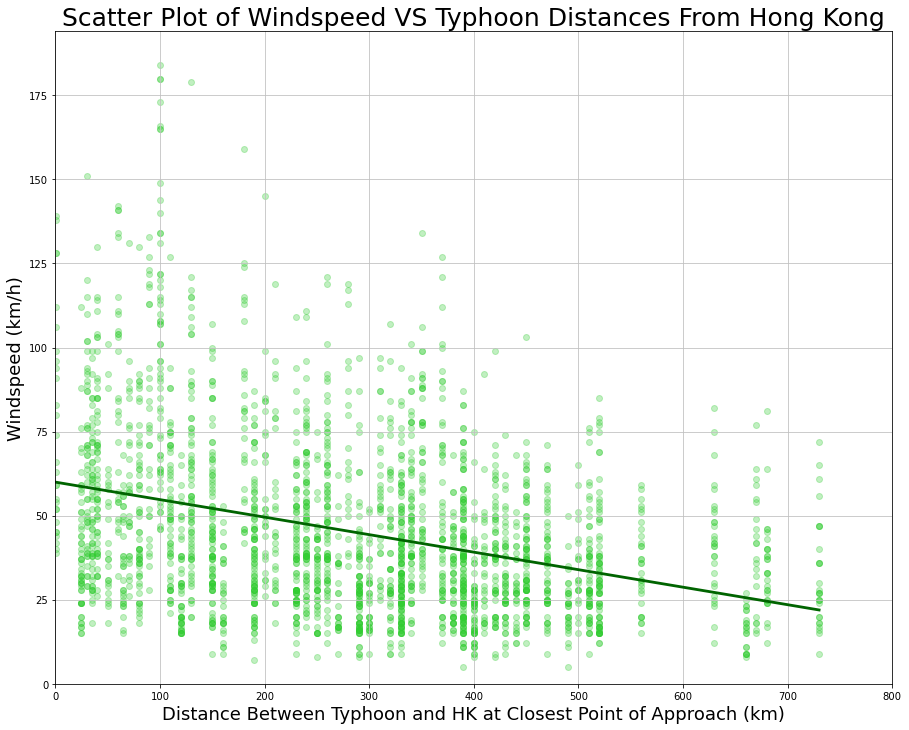

In [21]:
# Create Array of Typhoon Distances From Hong Kong Corresponding With Each Windspeed Data
All_Distance_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_Distance_Array)):
    All_Distance_Array[i] = CPA_Distance_Array[i % len(CPA_Distance_Array)]
All_Distance_Array_No_Nan = All_Distance_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds Vs Distance From Hong Kong of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_Distance_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeed VS Typhoon Distances From Hong Kong', fontsize=25)
Axes.set_xlabel('Distance Between Typhoon and HK at Closest Point of Approach (km)', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 800)
pyplot.ylim(0, numpy.max(All_Windspeed_Array_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Distance_Slope, All_Windspeed_Distance_Intercept = \
numpy.polyfit(All_Distance_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Distance_Best_Fit_x = numpy.arange(numpy.max(All_Distance_Array)+1)
All_Windspeed_Distance_Best_Fit_Line = All_Windspeed_Distance_Slope*All_Windspeed_Distance_Best_Fit_x + \
All_Windspeed_Distance_Intercept
pyplot.plot(All_Windspeed_Distance_Best_Fit_x, All_Windspeed_Distance_Best_Fit_Line, c='darkgreen', linewidth=2.8)
print (All_Windspeed_Distance_Slope, All_Windspeed_Distance_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Distance_Correlation_Matrix = numpy.corrcoef(All_Distance_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Distance_Correlation = All_Windspeed_Distance_Correlation_Matrix[0][1]
print (All_Windspeed_Distance_Correlation)

-0.10829107602968077 51.78411938597467
-0.15716623155958892


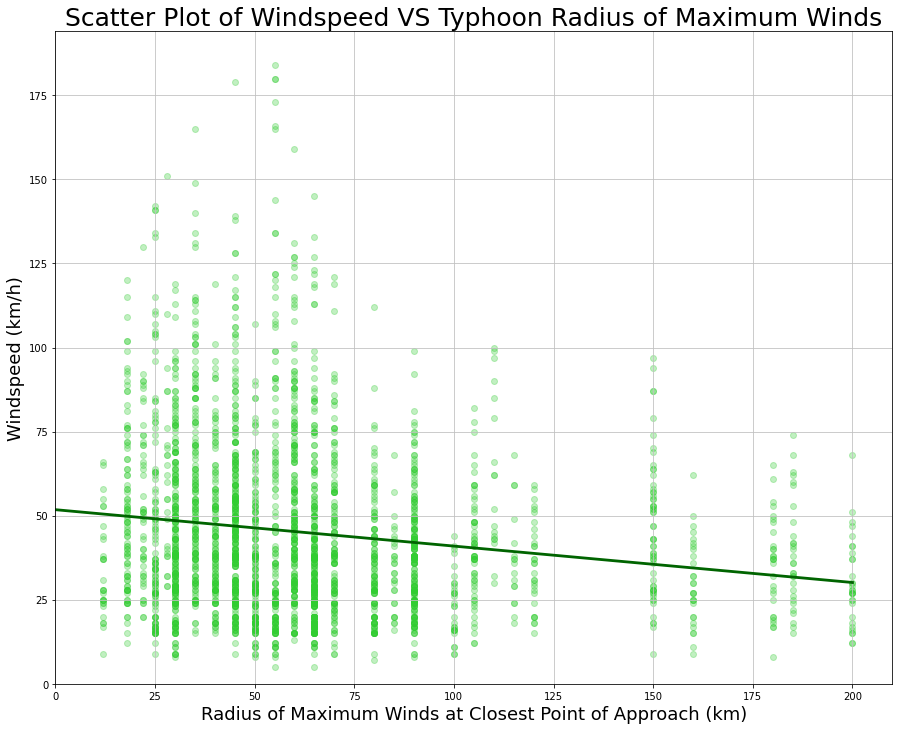

In [22]:
# Create Array of Typhoon Radius of Max Winds Corresponding With Each Windspeed Data
All_R_Max_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_R_Max_Array)):
    All_R_Max_Array[i] = CPA_R_Max_Array[i % len(CPA_R_Max_Array)]
All_R_Max_Array_No_Nan = All_R_Max_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds VS Radius of Max Winds of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_R_Max_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeed VS Typhoon Radius of Maximum Winds', fontsize=25)
Axes.set_xlabel('Radius of Maximum Winds at Closest Point of Approach (km)', fontsize=18)
Axes.set_ylabel('Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_R_Max_Array_No_Nan)+10)
pyplot.ylim(0, numpy.max(All_Windspeed_Array_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_R_Max_Slope, All_Windspeed_R_Max_Intercept = \
numpy.polyfit(All_R_Max_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_R_Max_Best_Fit_x = numpy.arange(numpy.max(All_R_Max_Array)+1)
All_Windspeed_R_Max_Best_Fit_Line = All_Windspeed_R_Max_Slope*All_Windspeed_R_Max_Best_Fit_x + \
All_Windspeed_R_Max_Intercept
pyplot.plot(All_Windspeed_R_Max_Best_Fit_x, All_Windspeed_R_Max_Best_Fit_Line, c='darkgreen', linewidth=2.8)
print (All_Windspeed_R_Max_Slope, All_Windspeed_R_Max_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_R_Max_Correlation_Matrix = numpy.corrcoef(All_R_Max_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_R_Max_Correlation = All_Windspeed_R_Max_Correlation_Matrix[0][1]
print (All_Windspeed_R_Max_Correlation)

In [23]:
# Calculate Theortetical Windspeed of All Typhoons Under Modified Rankine Vortex Model
B = 0.5
All_MRV_Windspeed_Array = numpy.zeros(len(All_Intensity_Array))
for i in range(len(All_MRV_Windspeed_Array)):
    if All_R_Max_Array[i] <= All_Distance_Array[i]:
        All_MRV_Windspeed_Array[i] = All_Intensity_Array[i] * (All_R_Max_Array[i] / All_Distance_Array[i]) ** B
    else:
        All_MRV_Windspeed_Array[i] = All_Intensity_Array[i] * (All_Distance_Array[i] / All_R_Max_Array[i]) ** B
print (All_MRV_Windspeed_Array)
All_MRV_Windspeed_Array_No_Nan = All_MRV_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]

[42.14636152 41.180497   39.34735424 ... 77.07139547 32.67486892
 33.6269123 ]


0.575514591231931 17.16637480928157
0.5353151007591458


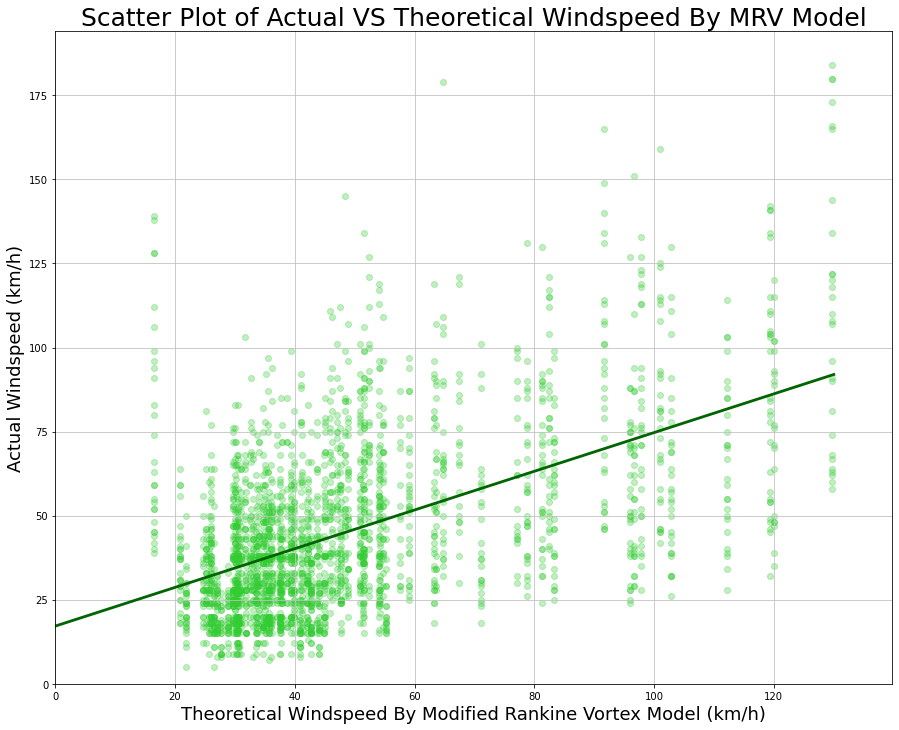

In [24]:
# Draw Scatter Plot of All Actual Windspeeds With Theoretical Windspeed By MRV Model
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_MRV_Windspeed_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model', fontsize=25)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_MRV_Windspeed_Array)+10)
pyplot.ylim(0, numpy.max(All_Windspeed_Array_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Actual_MRV_Slope, All_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(All_MRV_Windspeed_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(All_MRV_Windspeed_Array)+1)
All_Windspeed_Actual_MRV_Best_Fit_Line = All_Windspeed_Actual_MRV_Slope*All_Windspeed_Actual_MRV_Best_Fit_x + \
All_Windspeed_Actual_MRV_Intercept
pyplot.plot(All_Windspeed_Actual_MRV_Best_Fit_x, All_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', linewidth=2.8)
print (All_Windspeed_Actual_MRV_Slope, All_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(All_MRV_Windspeed_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Actual_MRV_Correlation = All_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print (All_Windspeed_Actual_MRV_Correlation)

In [25]:
# Create 2D Lists of Windspeeds Typhoon Intensities, Distances and R Max of Each Quadrant Corresponding With Each Windspeed Data
Quadrant_Windspeed_List_No_Nan = []
Quadrant_Intensity_List_No_Nan = []
Quadrant_Distance_List_No_Nan = []
Quadrant_R_Max_List_No_Nan = []
for k in range(len(Quadrant_Windspeeds)):
    Quadrant_Windspeed_List_No_Nan.append([])
    Quadrant_Intensity_List_No_Nan.append([])
    Quadrant_Distance_List_No_Nan.append([])
    Quadrant_R_Max_List_No_Nan.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        for j in range(len(Quadrant_Windspeeds[k][i])):
            if Quadrant_Windspeeds[k][i][j] >= 0:
                Quadrant_Windspeed_List_No_Nan[k].append(Quadrant_Windspeeds[k][i][j])
                Quadrant_Intensity_List_No_Nan[k].append(Quadrant_CPA_Intensity[k][i])
                Quadrant_Distance_List_No_Nan[k].append(Quadrant_CPA_Distance[k][i])
                Quadrant_R_Max_List_No_Nan[k].append(Quadrant_CPA_R_Max[k][i])

In [26]:
# Calculate Theortetical Windspeed of Each Quadrant Under Modified Rankine Vortex Model
B = 0.5
Quadrant_MRV_Windspeed_List_No_Nan = []
for k in range(len(Quadrant_Intensity_List_No_Nan)):
    Quadrant_MRV_Windspeed_List_No_Nan.append([])
    for i in range(len(Quadrant_Intensity_List_No_Nan[k])):
        if Quadrant_R_Max_List_No_Nan[k][i] <= Quadrant_Distance_List_No_Nan[k][i]:
            Quadrant_MRV_Windspeed_List_No_Nan[k].append(Quadrant_Intensity_List_No_Nan[k][i] * \
            (Quadrant_R_Max_List_No_Nan[k][i] / Quadrant_Distance_List_No_Nan[k][i]) ** B)
        else:
            Quadrant_MRV_Windspeed_List_No_Nan[k].append(Quadrant_Intensity_List_No_Nan[k][i] * \
            (Quadrant_Distance_List_No_Nan[k][i] / Quadrant_R_Max_List_No_Nan[k][i]) ** B)

0.5613977459285892 7.239941472052756
0.5966691163070532


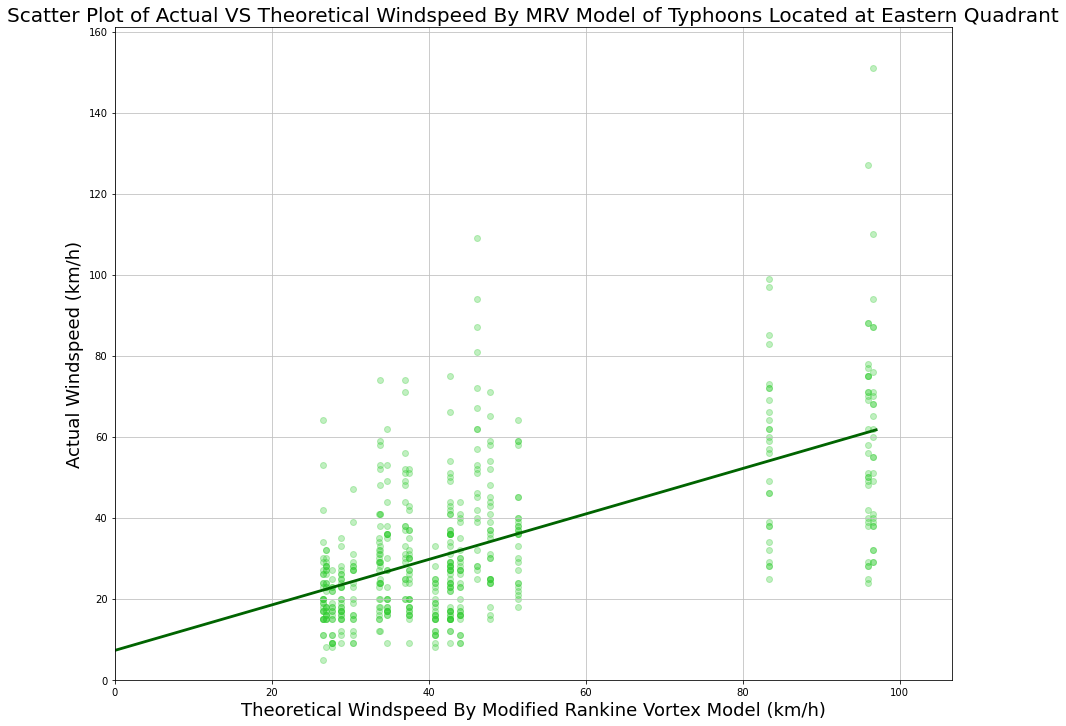

In [27]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Eastern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[0], Quadrant_Windspeed_List_No_Nan[0], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Eastern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[0])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_List_No_Nan[0])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Slope, E_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[0], Quadrant_Windspeed_List_No_Nan[0], 1)
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[0])+1)
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = E_Quadrant_Windspeed_Actual_MRV_Slope * \
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + E_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (E_Quadrant_Windspeed_Actual_MRV_Slope, E_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[0], \
Quadrant_Windspeed_List_No_Nan[0])
E_Quadrant_Windspeed_Actual_MRV_Correlation = E_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print (E_Quadrant_Windspeed_Actual_MRV_Correlation)

0.6843036325924607 16.46159349728692
0.6205609775350088


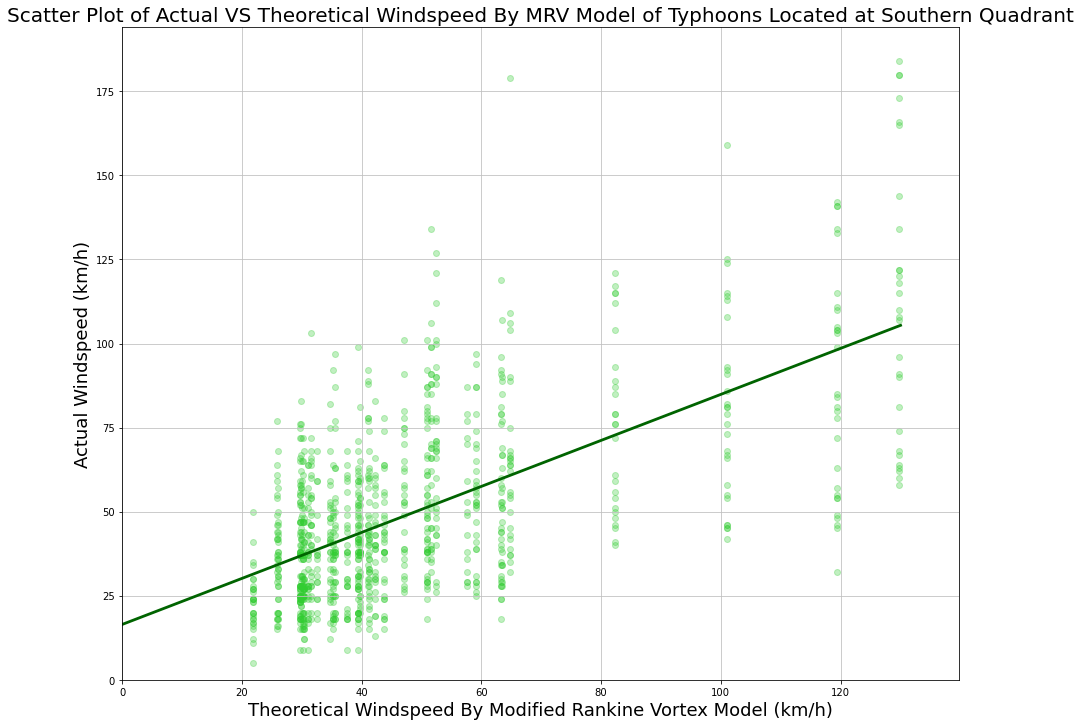

In [28]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Southern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[1], Quadrant_Windspeed_List_No_Nan[1], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Southern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[1])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_List_No_Nan[1])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Slope, S_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[1], Quadrant_Windspeed_List_No_Nan[1], 1)
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[1])+1)
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = S_Quadrant_Windspeed_Actual_MRV_Slope * \
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + S_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (S_Quadrant_Windspeed_Actual_MRV_Slope, S_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[1], \
Quadrant_Windspeed_List_No_Nan[1])
S_Quadrant_Windspeed_Actual_MRV_Correlation = S_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print (S_Quadrant_Windspeed_Actual_MRV_Correlation)

0.7040688049946414 15.47948544062413
0.555184494141533


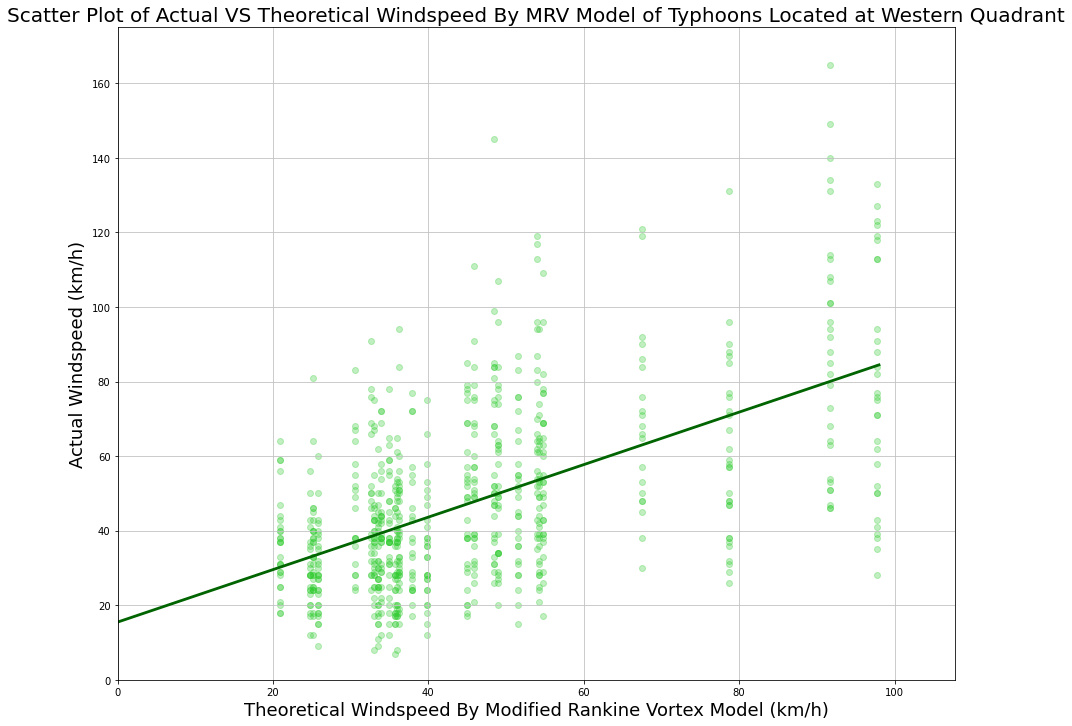

In [29]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Western Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[2], Quadrant_Windspeed_List_No_Nan[2], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Western Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[2])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_List_No_Nan[2])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Slope, W_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[2], Quadrant_Windspeed_List_No_Nan[2], 1)
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[2])+1)
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = W_Quadrant_Windspeed_Actual_MRV_Slope * \
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + W_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (W_Quadrant_Windspeed_Actual_MRV_Slope, W_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[2], \
Quadrant_Windspeed_List_No_Nan[2])
W_Quadrant_Windspeed_Actual_MRV_Correlation = W_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print (W_Quadrant_Windspeed_Actual_MRV_Correlation)

0.5218528279448628 12.056949186059791
0.6275633638357581


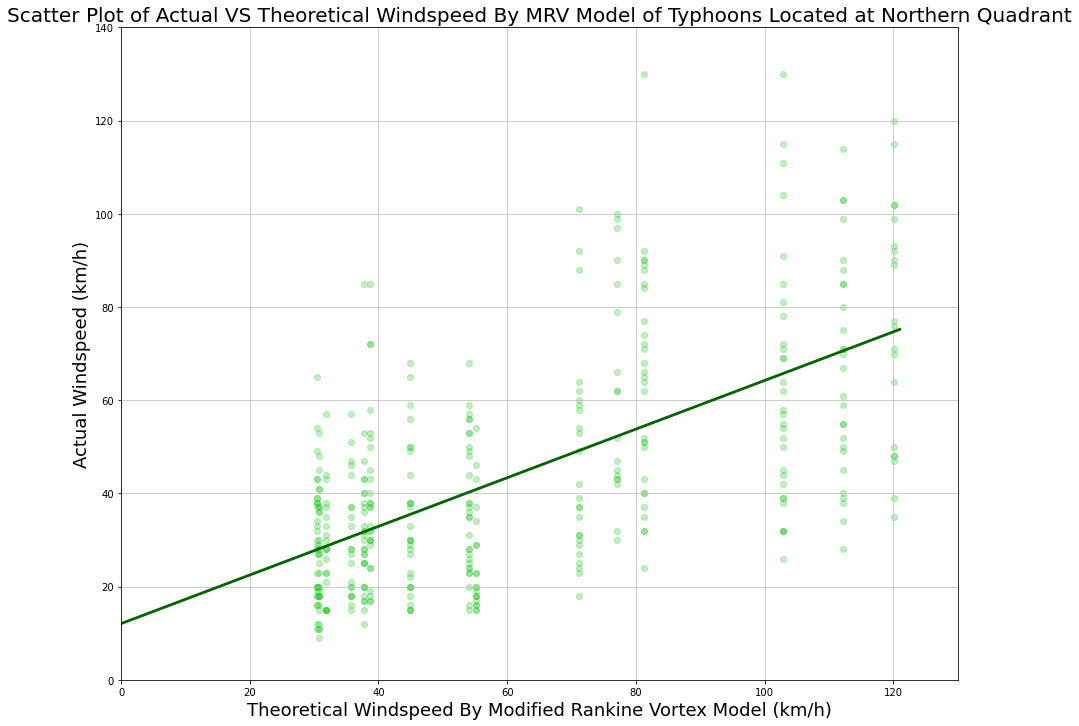

In [30]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Northern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[3], Quadrant_Windspeed_List_No_Nan[3], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Northern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[3])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_List_No_Nan[3])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Slope, N_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[3], Quadrant_Windspeed_List_No_Nan[3], 1)
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[3])+1)
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = N_Quadrant_Windspeed_Actual_MRV_Slope * \
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + N_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (N_Quadrant_Windspeed_Actual_MRV_Slope, N_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[3], \
Quadrant_Windspeed_List_No_Nan[3])
N_Quadrant_Windspeed_Actual_MRV_Correlation = N_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print (N_Quadrant_Windspeed_Actual_MRV_Correlation)

In [31]:
# Input Windspeed Ratio To Average of Hong Kong Data Into 2D Array
Windspeed_Stations_Ratio_To_HK_Ave = numpy.zeros((len(Windspeed_Ratio_File),len(Windspeed_Stations_List)-2))
for k in range(len(Windspeed_Stations_Ratio_To_HK_Ave)):
    for j in range(len(Windspeed_Stations_Ratio_To_HK_Ave[k])):
        Windspeed_Stations_Ratio_To_HK_Ave[k][j] = Windspeed_Ratio_File.iloc[k,j+1]
print (Windspeed_Stations_Ratio_To_HK_Ave)

[[0.840653   0.98220211 1.24112778 1.06989074 1.46436698 1.17341047
  0.95217565 0.70866302 1.17889385 1.63877577 0.99951593 1.10507712
  0.52025125 1.03200881 1.29925828 0.77290562 0.6738954  0.57555151
  0.98820164 0.63732977 1.09898625 1.72379643 0.81071347 1.61800194
  0.58347341 0.78700334 0.70310588 1.48953476 0.63590763 0.69532218]
 [1.04132478 1.04079709 1.37797292 1.46762521 1.3593246  1.06565787
  0.84074992 0.68053208 0.8540439  2.00689355 0.9451702  1.20210469
  0.41013306 0.95114093 1.1082358  0.91425229 0.53107724 0.72033863
  0.90644406 0.59369403 1.30251838 1.69511182 0.935505   1.50155927
  0.48758675 0.61745695 0.58196442 1.51343131 0.58796615 0.75938708]
 [1.14018914 0.98006664 1.47503823 1.35467086 1.23631112 1.10910746
  0.93769837 0.67663166 0.79216107 2.08204376 0.88095118 1.08212273
  0.39624933 1.01631349 1.19118403 0.88217138 0.55566199 0.70003352
  0.98111781 0.55624655 1.21182319 1.75520459 0.92070225 1.40132055
  0.49039931 0.73435001 0.68045398 1.4658434  

In [32]:
# Create 3D Lists of Windspeeds Typhoon Intensities, Distances and R Max of Each Quadrant Corresponding With Each Windspeed Data
# Ignore Windspeed Stations With Less Than 30 Data Points: Lamma Island (Index 8) and Tap Mun East (Index 24)
Quadrant_Windspeed_Ratio_List = []
Quadrant_Intensity_Ratio_List = []
Quadrant_Distance_Ratio_List = []
Quadrant_R_Max_Ratio_List = []
Quadrant_Stations_Ratio_List = []
for k in range(len(Quadrant_Windspeeds)):
    Quadrant_Windspeed_Ratio_List.append([])
    Quadrant_Intensity_Ratio_List.append([])
    Quadrant_Distance_Ratio_List.append([])
    Quadrant_R_Max_Ratio_List.append([])
    Quadrant_Stations_Ratio_List.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        Quadrant_Windspeed_Ratio_List[k].append([])
        Quadrant_Intensity_Ratio_List[k].append([])
        Quadrant_Distance_Ratio_List[k].append([])
        Quadrant_R_Max_Ratio_List[k].append([])
        Quadrant_Stations_Ratio_List[k].append([])
        for j in range(len(Windspeed_Stations_Ratio_To_HK_Ave[k])):
            Quadrant_Intensity_Ratio_List[k][i].append(Quadrant_CPA_Intensity[k][i])
            Quadrant_Distance_Ratio_List[k][i].append(Quadrant_CPA_Distance[k][i])
            Quadrant_R_Max_Ratio_List[k][i].append(Quadrant_CPA_R_Max[k][i])
            Quadrant_Stations_Ratio_List[k][i].append(Windspeed_Stations_Ratio_To_HK_Ave[k][j])
            if j < 8:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j])
            if j >= 8 and j < 23:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j+1])
            if j >= 23:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j+2])

In [33]:
# Calculate Theortetical Windspeed of Each Quadrant Under Modified Rankine Vortex Model Using Windspeed Ratios To HK Average
B = 0.5
Quadrant_MRV_Windspeed_Ratio_List = []
for k in range(len(Quadrant_Intensity_Ratio_List)):
    Quadrant_MRV_Windspeed_Ratio_List.append([])
    for i in range(len(Quadrant_Intensity_Ratio_List[k])):
        Quadrant_MRV_Windspeed_Ratio_List[k].append([])
        for j in range(len(Quadrant_Intensity_Ratio_List[k][i])):
            if Quadrant_R_Max_Ratio_List[k][i] <= Quadrant_Distance_Ratio_List[k][i]:
                Quadrant_MRV_Windspeed_Ratio_List[k][i].append((Quadrant_Intensity_Ratio_List[k][i][j] * \
                (Quadrant_R_Max_Ratio_List[k][i][j] / Quadrant_Distance_Ratio_List[k][i][j]) ** B) * \
                Quadrant_Stations_Ratio_List[k][i][j])
            else:
                Quadrant_MRV_Windspeed_Ratio_List[k][i].append((Quadrant_Intensity_Ratio_List[k][i][j] * \
                (Quadrant_Distance_Ratio_List[k][i][j] / Quadrant_R_Max_Ratio_List[k][i][j]) ** B) * \
                Quadrant_Stations_Ratio_List[k][i][j])
#
# Change 3D List Into 2D List and Remove NaN
Quadrant_MRV_Windspeed_Ratio_List_No_Nan = []
Quadrant_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_MRV_Windspeed_Ratio_List)):
    Quadrant_MRV_Windspeed_Ratio_List_No_Nan.append([])
    Quadrant_Windspeed_Ratio_List_No_Nan.append([])
    for i in range(len(Quadrant_MRV_Windspeed_Ratio_List[k])):
        for j in range(len(Quadrant_MRV_Windspeed_Ratio_List[k][i])):
            if Quadrant_Windspeed_Ratio_List[k][i][j]>= 0:
                Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_MRV_Windspeed_Ratio_List[k][i][j])
                Quadrant_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_Windspeed_Ratio_List[k][i][j])
#
# Change 2D List Into 1D List For All Windspeeds
All_MRV_Windspeed_Ratio_List_No_Nan = []
All_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_MRV_Windspeed_Ratio_List_No_Nan)):
    for i in range(len(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k])):
        All_MRV_Windspeed_Ratio_List_No_Nan.append(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k][i])
        All_Windspeed_Ratio_List_No_Nan.append(Quadrant_Windspeed_Ratio_List_No_Nan[k][i])
print (All_MRV_Windspeed_Ratio_List_No_Nan)
print (All_Windspeed_Ratio_List_No_Nan)

[35.88810581272386, 41.93094315932887, 52.98467368507252, 45.67443657208522, 62.51492221114922, 50.09377095949862, 40.649090999580174, 30.253354634562278, 50.32786081036797, 42.67008330724973, 47.17656925763199, 22.209915395562255, 44.057228498785555, 55.466308382079426, 32.99591941624737, 28.769098993450978, 24.570724871515257, 42.1870677773342, 27.208084743824013, 46.916545444938535, 73.5901598272504, 34.6099646423021, 69.07371374364773, 24.908916460231783, 33.59776179260315, 30.016116105417474, 63.58935381376477, 27.14737262809803, 29.683824270538427, 70.04641016124378, 81.8408209759797, 103.41549382883301, 89.14737196516224, 122.01663429246481, 97.77302946728364, 79.33890174356372, 59.04850198961435, 98.22992607236347, 136.54903931764906, 83.28347482453002, 92.07923475996918, 43.34931610941992, 85.99090501175004, 108.25914879251431, 56.15153161274477, 82.34072504277033, 53.10474377257546, 91.57172024441738, 143.6332846874158, 67.55173403833757, 134.81808456250386, 48.61722678121823

0.7066500055384852 10.69402823133461
0.8530182217137797


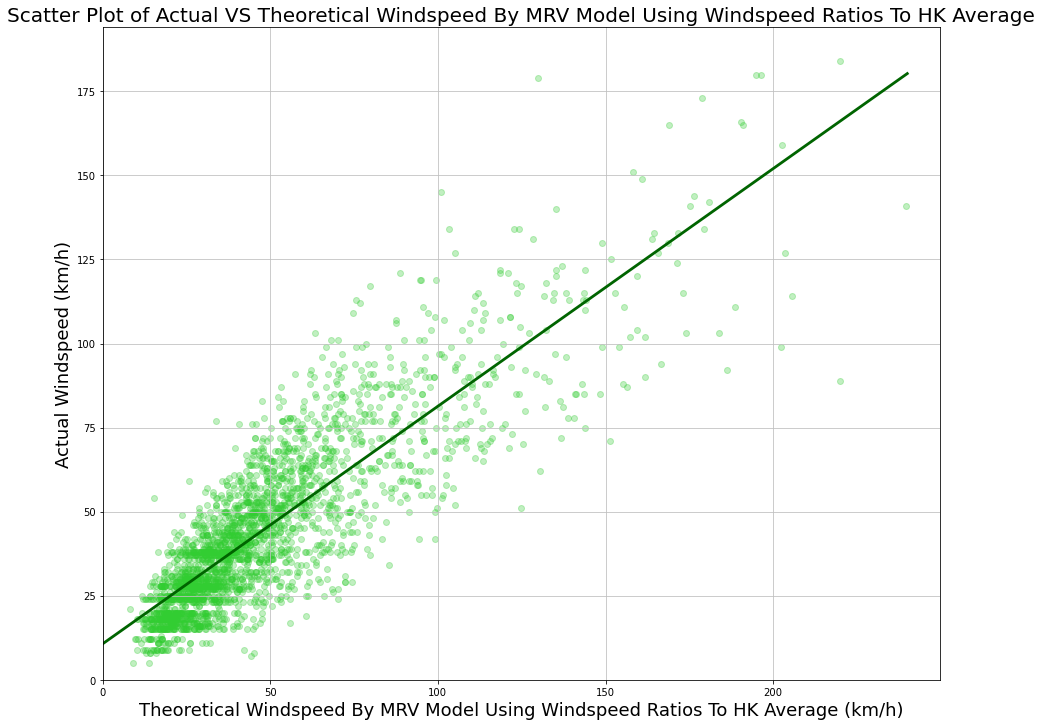

In [34]:
# Draw Scatter Plot of All Actual Windspeeds With Theoretical Windspeed By MRV Model
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model Using Windspeed Ratios To HK Average', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By MRV Model Using Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_MRV_Windspeed_Ratio_List_No_Nan)+10)
pyplot.ylim(0, numpy.max(All_Windspeed_Ratio_List_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Actual_MRV_Ratio_Slope, All_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, 1)
All_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(All_MRV_Windspeed_Ratio_List_No_Nan)+1)
All_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = All_Windspeed_Actual_MRV_Ratio_Slope*All_Windspeed_Actual_MRV_Ratio_Best_Fit_x + \
All_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(All_Windspeed_Actual_MRV_Ratio_Best_Fit_x, All_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', linewidth=2.8)
print (All_Windspeed_Actual_MRV_Ratio_Slope, All_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan)
All_Windspeed_Actual_MRV_Ratio_Correlation = All_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print (All_Windspeed_Actual_MRV_Ratio_Correlation)

0.630451732825837 4.19923538998647
0.8528648375175673


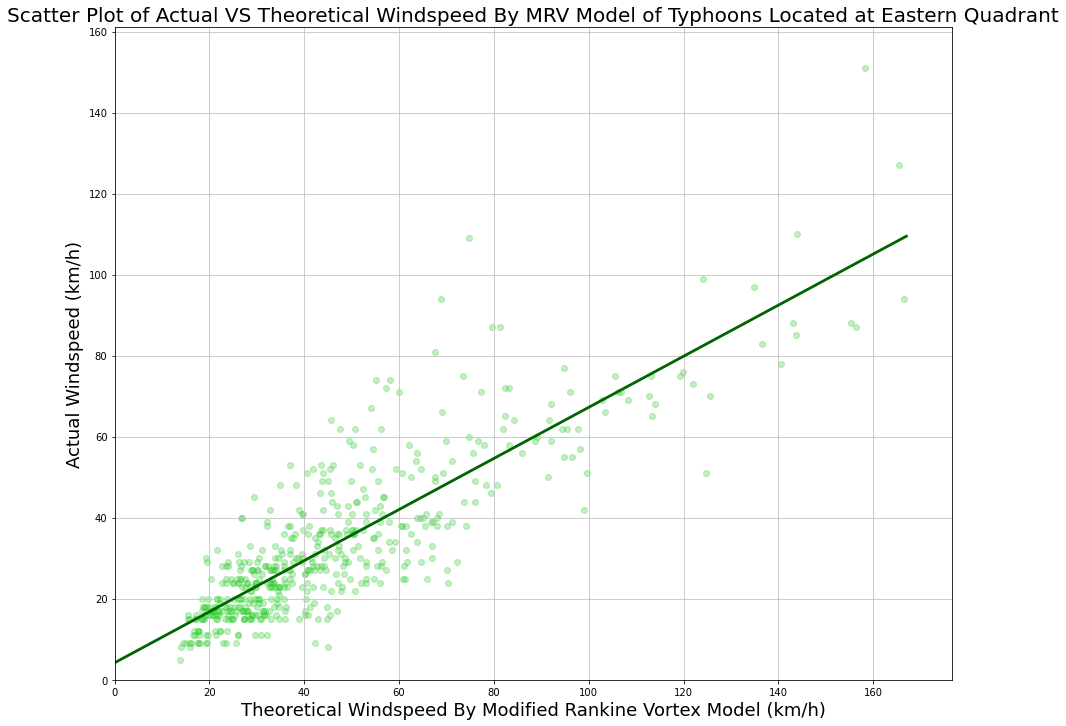

In [35]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Eastern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Eastern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[0])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], 1)
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0])+1)
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], \
Quadrant_Windspeed_Ratio_List_No_Nan[0])
E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print (E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

0.8053363172037157 11.446826972930069
0.914992572824839


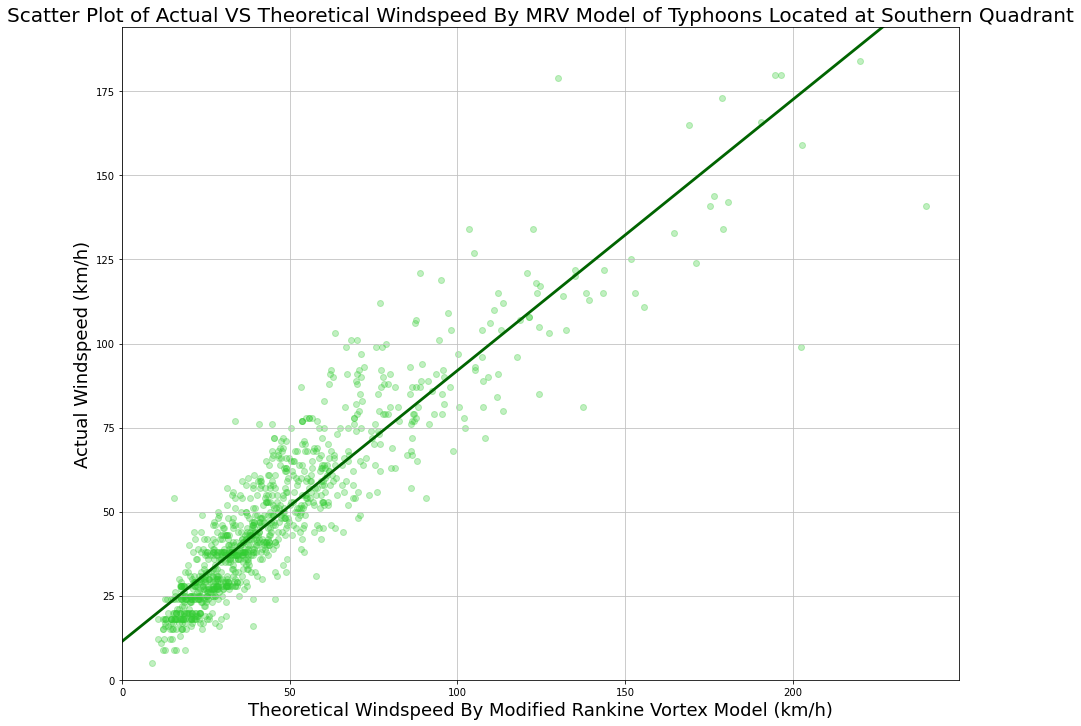

In [36]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Southern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Southern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[1])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], 1)
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1])+1)
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], \
Quadrant_Windspeed_Ratio_List_No_Nan[1])
S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print (S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

0.8313985393207928 10.1533213854419
0.9050377008381486


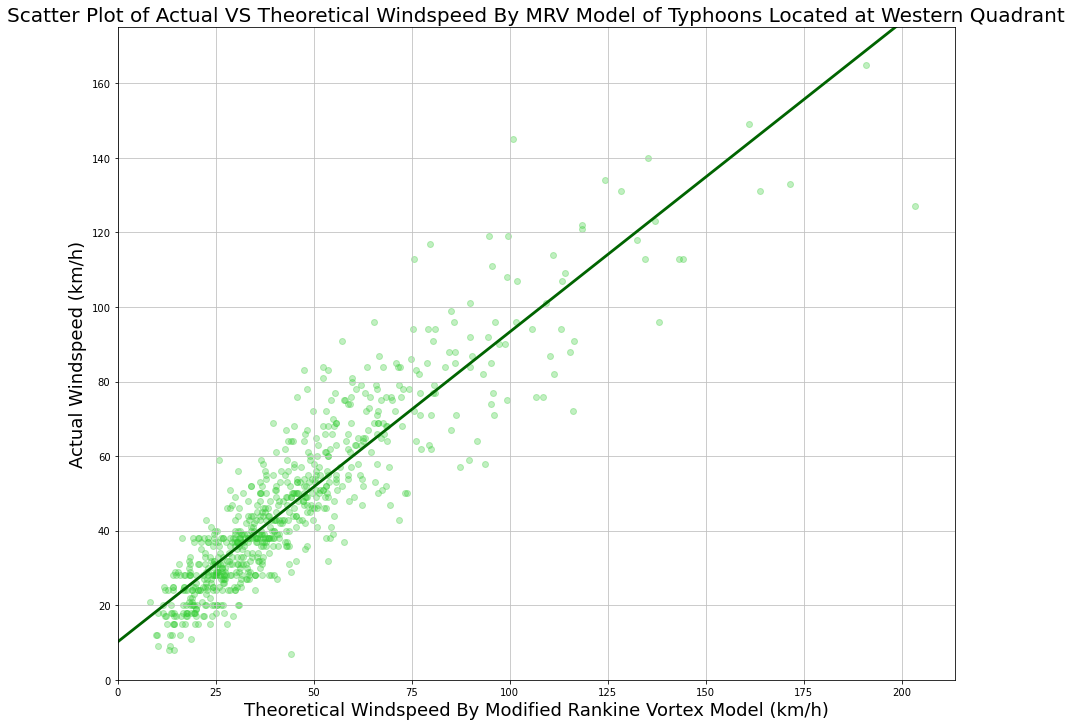

In [37]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Western Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Western Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[2])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], 1)
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2])+1)
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], \
Quadrant_Windspeed_Ratio_List_No_Nan[2])
W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print (W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

0.5724204209132377 9.150895121036191
0.8957911471287527


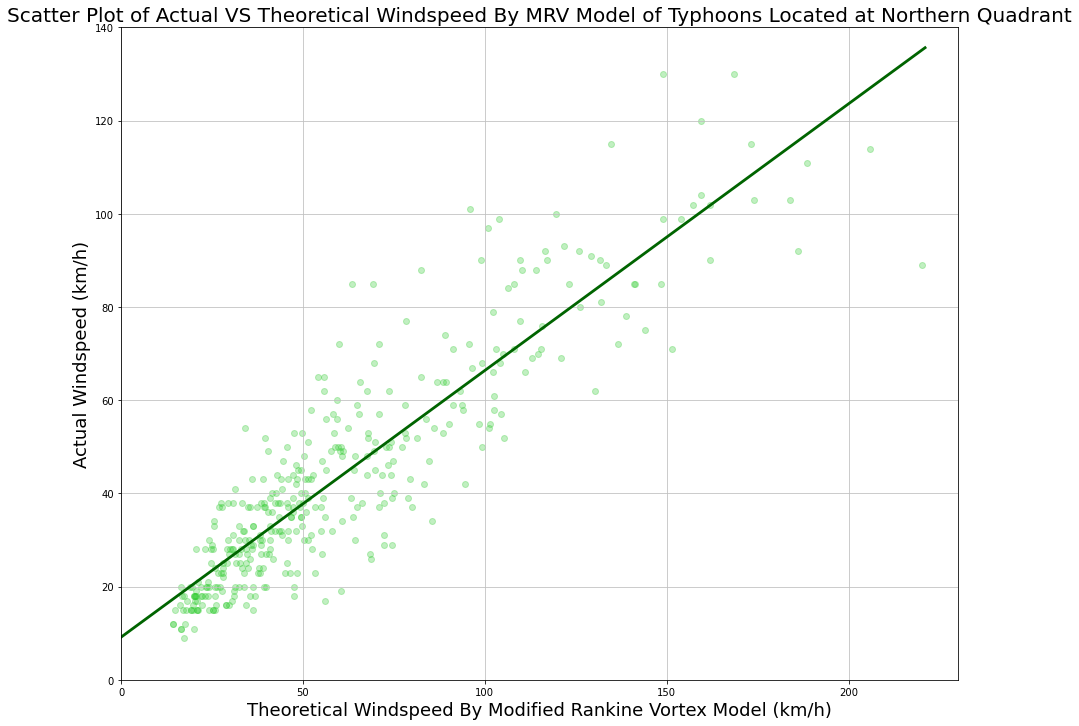

In [38]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model of Typhoons Located at Northern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeed By MRV Model of Typhoons Located at Northern Quadrant', \
fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[3])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], 1)
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3])+1)
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
print (N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], \
Quadrant_Windspeed_Ratio_List_No_Nan[3])
N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print (N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)